## **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **DATASET**

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/000 Tugas NOW/data/Dataset UAS.csv')

## **DATA UNDERSTANDING**

In [ ]:
print(f"Jumlah Baris = {df.shape[0]}")
print(f"Jumlah Kolom = {df.shape[1]}")

Jumlah Baris = 1470
Jumlah Kolom = 26


No     1233
Yes     237
Name: Attrition, dtype: int64

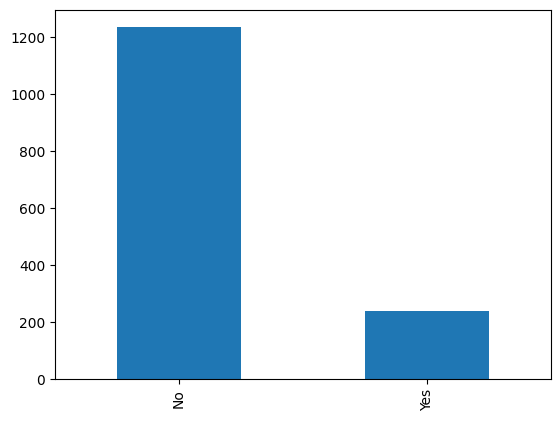

In [ ]:
df['Attrition'].value_counts().plot(kind='bar')
df['Attrition'].value_counts()

## **PREPROCESSING**

### **Cek Data Duplikat**

In [ ]:
# Memeriksa keberadaan data duplikat
df.duplicated().sum()

0

### **Cek Missing Values**

In [ ]:
# Memeriksa keberadaan missing values
df.isna().sum()

Attrition                    0
Age                          0
BusinessTravel              55
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                  88
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
YearsAtCompany               0
dtype: int64

#### **Menangani Missing Values pada kolom BusinessTravel dan Hourly Rate**

In [ ]:
modus_BusinessTravel = df['BusinessTravel'].mode()[0]
df['BusinessTravel'] = df['BusinessTravel'].fillna(modus_BusinessTravel)

In [ ]:
mean_HourlyRate = df['HourlyRate'].mean()
df['HourlyRate'] = df['HourlyRate'].fillna(mean_HourlyRate)

In [ ]:
# Memeriksa kembali keberadaan missing values
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
YearsAtCompany              0
dtype: int64

### **Deklarasi Variabel Fitur & Target**

In [ ]:
x = df.drop(["Attrition"], axis=1)
y = df["Attrition"]

### **One Hot Encoding**

In [ ]:
# One hot encoding pada fitur kategorikal
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(handle_unknown='ignore')
x_cat = pd.DataFrame(encoder.fit_transform(x[categorical_cols]).toarray(), columns=encoder.get_feature_names_out(categorical_cols))
x_num = x.select_dtypes(exclude=['object'])
x = pd.concat([x_cat, x_num], axis=1)

### **Labels Encoding**

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

### **Data Splitting**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

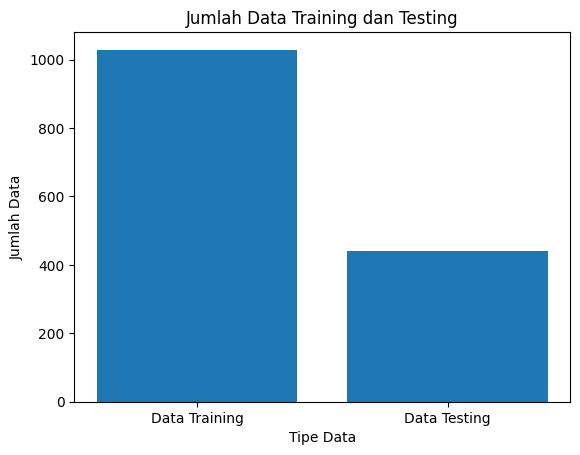

In [ ]:
# Data training dan testing
jumlah_data_training = x_train.shape[0]
jumlah_data_testing = x_test.shape[0]

# Menyiapkan data untuk bar chart
data = [jumlah_data_training, jumlah_data_testing]
labels = ['Data Training', 'Data Testing']

# Membuat bar chart
plt.bar(labels, data)

# Memberikan judul dan label sumbu
plt.title('Jumlah Data Training dan Testing')
plt.xlabel('Tipe Data')
plt.ylabel('Jumlah Data')

# Menampilkan bar chart
plt.show()

### **SMOTE**

#### **Sebelum SMOTE**

In [ ]:
print("Jumlah label 'Yes' sebelum oversampling pada data training: {}".format(sum(y_train == 1)))
print("Jumlah label 'No' sebelum oversampling pada data training: {}".format(sum(y_train == 0)))

Jumlah label 'Yes' sebelum oversampling pada data training: 167
Jumlah label 'No' sebelum oversampling pada data training: 862


In [ ]:
print("Jumlah label 'Yes' sebelum oversampling pada data testing: {}".format(sum(y_test == 1)))
print("Jumlah label 'No' sebelum oversampling pada data testing: {}".format(sum(y_test == 0)))

Jumlah label 'Yes' sebelum oversampling pada data testing: 70
Jumlah label 'No' sebelum oversampling pada data testing: 371


#### **Implementasi SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors = 3, random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)
x_test, y_test = sm.fit_resample(x_test, y_test)

#### **Setelah SMOTE**

In [ ]:
print("Jumlah label 'Yes' setelah oversampling pada data training: {}".format(sum(y_train == 1)))
print("Jumlah label 'No' setelah oversampling pada data training: {}".format(sum(y_train == 0)))

Jumlah label 'Yes' setelah oversampling pada data training: 862
Jumlah label 'No' setelah oversampling pada data training: 862


In [ ]:
print("Jumlah label 'Yes' setelah oversampling pada data testing: {}".format(sum(y_test == 1)))
print("Jumlah label 'No' setelah oversampling pada data testing: {}".format(sum(y_test == 0)))

Jumlah label 'Yes' setelah oversampling pada data testing: 371
Jumlah label 'No' setelah oversampling pada data testing: 371


In [ ]:
print(f"Jumlah Data Training = {x_train.shape[0]} \nJumlah Data Testing = {x_test.shape[0]}")

Jumlah Data Training = 1724 
Jumlah Data Testing = 742


# **MODELLING**

## **1. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

### **Classification Report Data Training**

In [ ]:
print("-Classification Report Data Training [RANDOM FOREST]-")
print("-----------------------------------------------------")
print(classification_report(y_train, y_pred_train))

-Classification Report Data Training [RANDOM FOREST]-
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       862
           1       1.00      1.00      1.00       862

    accuracy                           1.00      1724
   macro avg       1.00      1.00      1.00      1724
weighted avg       1.00      1.00      1.00      1724



### **Classification Report Data Testing**

In [ ]:
print("-Classification Report Data Testing [RANDOM FOREST]-")
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred_test))

-Classification Report Data Testing [RANDOM FOREST]-
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       371
           1       0.98      0.82      0.89       371

    accuracy                           0.90       742
   macro avg       0.91      0.90      0.90       742
weighted avg       0.91      0.90      0.90       742



### **Classification Report - Average Macro**

In [ ]:
print("====== Data Training RF ======")
print("------------------------------")
print(f'Accuracy  : {accuracy_score(y_train, y_pred_train)}')
print(f"Precision : {precision_score(y_train, y_pred_train, average='macro')}")
print(f"Recall    : {recall_score(y_train, y_pred_train, average='macro')}")
print(f"F1        : {f1_score(y_train, y_pred_train, average='macro')}")
print(" ")
print("======= Data Testing RF =======")
print("-------------------------------")
print(f'Accuracy  : {accuracy_score(y_test, y_pred_test)}')
print(f"Precision : {precision_score(y_test, y_pred_test, average='macro')}")
print(f"Recall    : {recall_score(y_test, y_pred_test, average='macro')}")
print(f"F1        : {f1_score(y_test, y_pred_test, average='macro')}")

====== Data Training RF ======
------------------------------
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1        : 1.0
 
======= Data Testing RF =======
-------------------------------
Accuracy  : 0.9002695417789758
Precision : 0.9110197626099477
Recall    : 0.9002695417789757
F1        : 0.8996131372448644


### **Confusion Matrix**

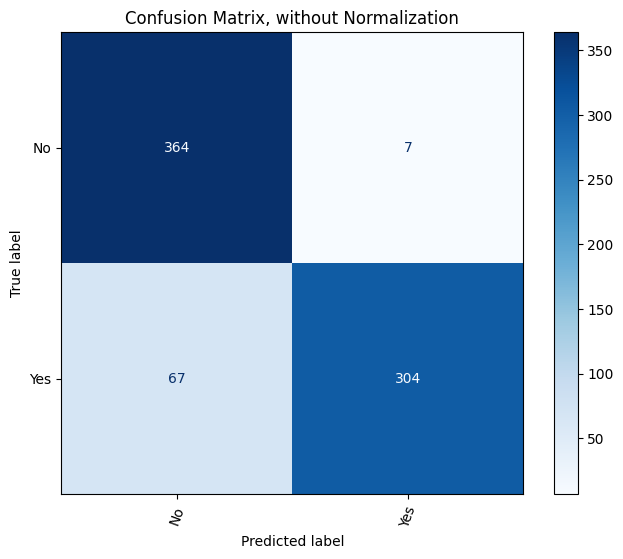

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Menampilkan confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Confusion Matrix, without Normalization')
plt.show()

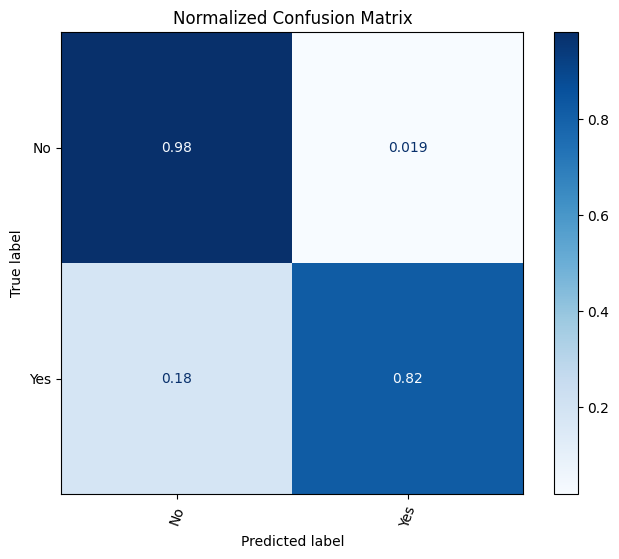

In [ ]:
# Menghitung confusion matrix yang telah dinormalisasi
cm_normalized = confusion_matrix(y_test, y_pred_test, normalize='true')

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)

# Menampilkan confusion matrix yang telah dinormalisasi
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Normalized Confusion Matrix')
plt.show()

## **2. Multi-Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=0)
mlp.fit(x_train, y_train)

# Prediksi dengan model yang sudah dilatih
y_pred_train = mlp.predict(x_train)
y_pred_test = mlp.predict(x_test)

### **Classification Report Data Training**

In [ ]:
print("-Classification Report Data Training [Multi-Layer P]-")
print("-----------------------------------------------------")
print(classification_report(y_train, y_pred_train))

-Classification Report Data Training [Multi-Layer P]-
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.29      0.43       862
           1       0.57      0.92      0.70       862

    accuracy                           0.61      1724
   macro avg       0.68      0.61      0.56      1724
weighted avg       0.68      0.61      0.56      1724



### **Classification Report Data Testing**

In [ ]:
print("-Classification Report Data Testing [Multi-Layer P.]-")
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred_test))

-Classification Report Data Testing [Multi-Layer P.]-
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.28      0.38       371
           1       0.53      0.83      0.65       371

    accuracy                           0.55       742
   macro avg       0.58      0.55      0.52       742
weighted avg       0.58      0.55      0.52       742



### **Classification Report - Average Macro**

In [ ]:
print("===== Data Training MLP ======")
print("------------------------------")
print(f'Accuracy  : {accuracy_score(y_train, y_pred_train)}')
print(f"Precision : {precision_score(y_train, y_pred_train, average='macro')}")
print(f"Recall    : {recall_score(y_train, y_pred_train, average='macro')}")
print(f"F1        : {f1_score(y_train, y_pred_train, average='macro')}")
print(" ")
print("====== Data Testing MLP ======")
print("------------------------------")
print(f'Accuracy  : {accuracy_score(y_test, y_pred_test)}')
print(f"Precision : {precision_score(y_test, y_pred_test, average='macro')}")
print(f"Recall    : {recall_score(y_test, y_pred_test, average='macro')}")
print(f"F1        : {f1_score(y_test, y_pred_test, average='macro')}")

===== Data Training MLP ======
------------------------------
Accuracy  : 0.6084686774941995
Precision : 0.6807030642192373
Recall    : 0.6084686774941995
F1        : 0.564996517953566
 
====== Data Testing MLP ======
------------------------------
Accuracy  : 0.5525606469002695
Precision : 0.5753397552720645
Recall    : 0.5525606469002695
F1        : 0.5159741270228


### **Confusion Matrix**

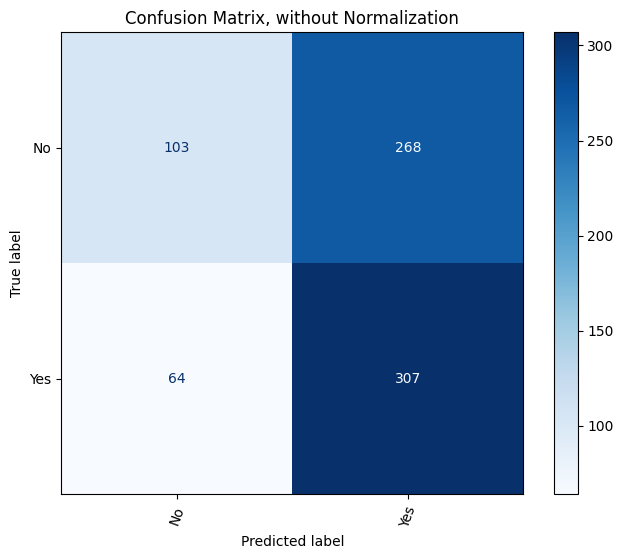

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Menampilkan confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Confusion Matrix, without Normalization')
plt.show()

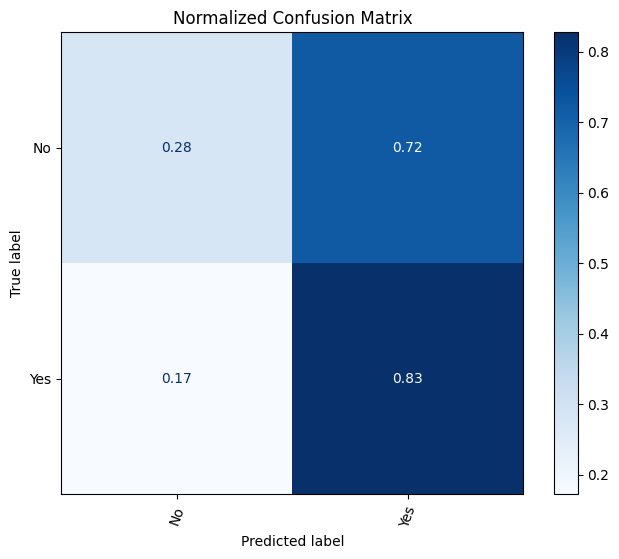

In [ ]:
# Menghitung confusion matrix yang telah dinormalisasi
cm_normalized = confusion_matrix(y_test, y_pred_test, normalize='true')

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)

# Menampilkan confusion matrix yang telah dinormalisasi
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Normalized Confusion Matrix')
plt.show()

## **3. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi dan latih model Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

# Prediksi dengan model yang sudah dilatih
y_pred_train = nb.predict(x_train)
y_pred_test = nb.predict(x_test)

### **Classification Report Data Training**

In [ ]:
print("--Classification Report Data Training [Naive Bayes]--")
print("-----------------------------------------------------")
print(classification_report(y_train, y_pred_train))

--Classification Report Data Training [Naive Bayes]--
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.58      0.69       862
           1       0.68      0.89      0.77       862

    accuracy                           0.74      1724
   macro avg       0.76      0.74      0.73      1724
weighted avg       0.76      0.74      0.73      1724



### **Classification Report Data Testing**

In [ ]:
print("--Classification Report Data Testing [Naive Bayes.]--")
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred_test))

--Classification Report Data Testing [Naive Bayes.]--
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.60      0.67       371
           1       0.67      0.83      0.74       371

    accuracy                           0.71       742
   macro avg       0.73      0.71      0.71       742
weighted avg       0.73      0.71      0.71       742



### **Classification Report - Average Macro**

In [ ]:
print("====== Data Training NB ======")
print("------------------------------")
print(f'Accuracy  : {accuracy_score(y_train, y_pred_train)}')
print(f"Precision : {precision_score(y_train, y_pred_train, average='macro')}")
print(f"Recall    : {recall_score(y_train, y_pred_train, average='macro')}")
print(f"F1        : {f1_score(y_train, y_pred_train, average='macro')}")
print(" ")
print("======= Data Testing NB ======")
print("------------------------------")
print(f'Accuracy  : {accuracy_score(y_test, y_pred_test)}')
print(f"Precision : {precision_score(y_test, y_pred_test, average='macro')}")
print(f"Recall    : {recall_score(y_test, y_pred_test, average='macro')}")
print(f"F1        : {f1_score(y_test, y_pred_test, average='macro')}")

====== Data Training NB ======
------------------------------
Accuracy  : 0.7360788863109049
Precision : 0.7623980015407283
Recall    : 0.7360788863109049
F1        : 0.729290696899933
 
======= Data Testing NB ======
------------------------------
Accuracy  : 0.7129380053908356
Precision : 0.7253290485269697
Recall    : 0.7129380053908356
F1        : 0.7089365463770385


### **Confusion Matrix**

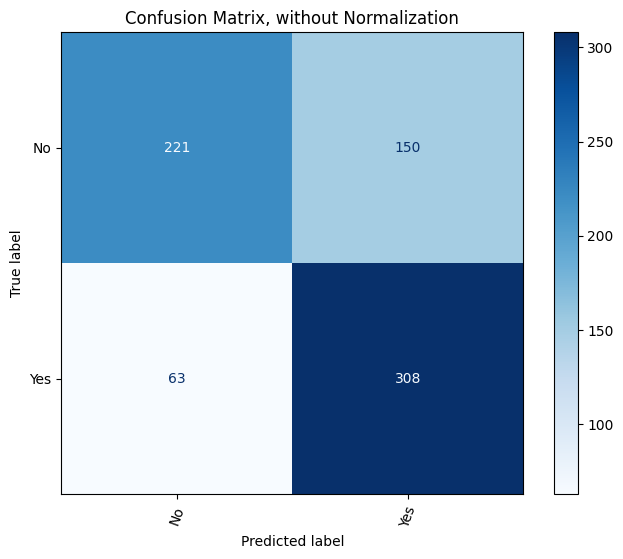

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Menampilkan confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Confusion Matrix, without Normalization')
plt.show()

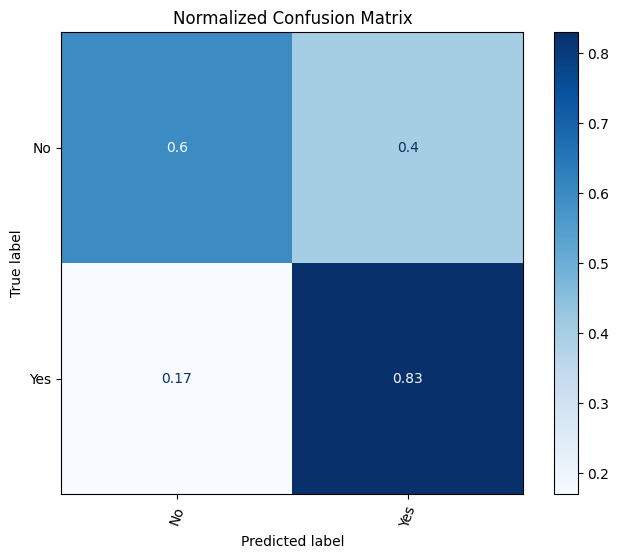

In [ ]:
# Menghitung confusion matrix yang telah dinormalisasi
cm_normalized = confusion_matrix(y_test, y_pred_test, normalize='true')

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)

# Menampilkan confusion matrix yang telah dinormalisasi
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Normalized Confusion Matrix')
plt.show()

## **4. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi dan latih model Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Prediksi dengan model yang sudah dilatih
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

### **Classification Report Data Training**

In [ ]:
print("-Classification Report Data Training [Decision Tree]-")
print("-----------------------------------------------------")
print(classification_report(y_train, y_pred_train))

-Classification Report Data Training [Decision Tree]-
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       862
           1       1.00      1.00      1.00       862

    accuracy                           1.00      1724
   macro avg       1.00      1.00      1.00      1724
weighted avg       1.00      1.00      1.00      1724



### **Classification Report Data Testing**

In [ ]:
print("-Classification Report Data Testing [Decision Tree.]-")
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred_test))

-Classification Report Data Testing [Decision Tree.]-
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       371
           1       0.85      0.77      0.81       371

    accuracy                           0.81       742
   macro avg       0.82      0.81      0.81       742
weighted avg       0.82      0.81      0.81       742



### **Classification Report - Average Macro**

In [ ]:
print("====== Data Training DT ======")
print("------------------------------")
print(f'Accuracy  : {accuracy_score(y_train, y_pred_train)}')
print(f"Precision : {precision_score(y_train, y_pred_train, average='macro')}")
print(f"Recall    : {recall_score(y_train, y_pred_train, average='macro')}")
print(f"F1        : {f1_score(y_train, y_pred_train, average='macro')}")
print(" ")
print("======= Data Testing DT ======")
print("------------------------------")
print(f'Accuracy  : {accuracy_score(y_test, y_pred_test)}')
print(f"Precision : {precision_score(y_test, y_pred_test, average='macro')}")
print(f"Recall    : {recall_score(y_test, y_pred_test, average='macro')}")
print(f"F1        : {f1_score(y_test, y_pred_test, average='macro')}")

====== Data Training DT ======
------------------------------
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F1        : 1.0
 
======= Data Testing DT ======
------------------------------
Accuracy  : 0.8140161725067385
Precision : 0.8166758251822545
Recall    : 0.8140161725067385
F1        : 0.81362484710816


### **Confusion Matrix**

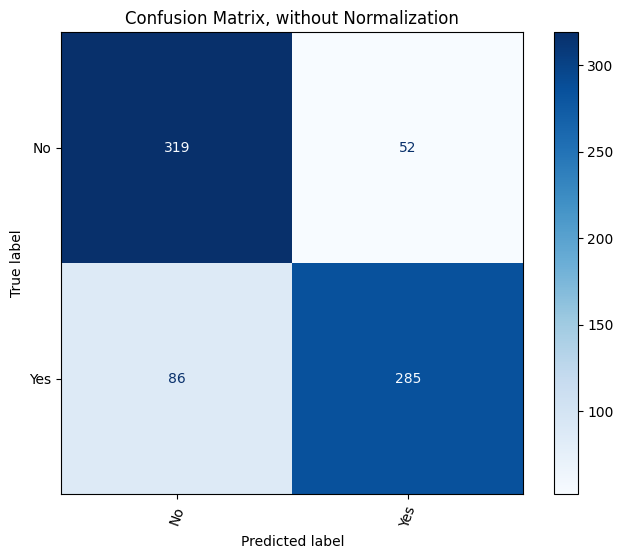

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Menampilkan confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Confusion Matrix, without Normalization')
plt.show()

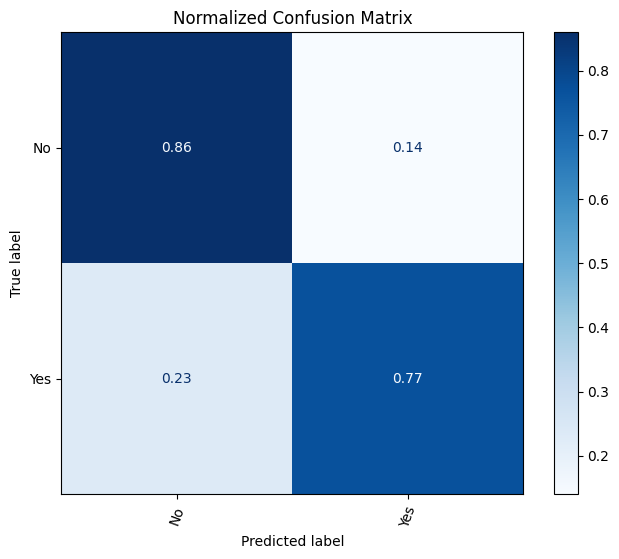

In [ ]:
# Menghitung confusion matrix yang telah dinormalisasi
cm_normalized = confusion_matrix(y_test, y_pred_test, normalize='true')

# Membuat objek ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)

# Menampilkan confusion matrix yang telah dinormalisasi
fig, ax = plt.subplots(figsize=(8, 6))
matrix.plot(ax=ax, cmap=plt.cm.Blues)

# Mengatur label sumbu x dengan rotasi 70 derajat
ax.set_xticklabels(le.classes_, rotation=70)

# Memberikan judul dan tampilkan plot
ax.set_title('Normalized Confusion Matrix')
plt.show()